In [268]:
import pandas as pd
import seaborn as sns
import numpy as np
# import plotly.express as px
from matplotlib import pyplot as plt

In [2]:
dataset = pd.read_csv('heart.csv')

In [3]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### What are the features (variables) in the dataset?  
The features availablle in this dataset are the following:  
* Age
* Sex
* ChestPainType
* RestingBP
* Cholesterol
* FastingBS
* RestingECG
* MaxHR
* ExerciseAngina
* Oldpeak
* ST_Slope
* HeartDisease

In [17]:
dataset.shape

(918, 12)

#### Let's check our features datatype and if there are some missing values  
There are 918 samples in this dataset, each of them with 11 features and 1 target value  
In this case, the datatypes match the values of each feature so we don't need to cast their types.  
We can also observe that there are not missing values in the columns. 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### What is the distribution of the target variable (heart disease)?  
The distribution of the target variable is balanced.  
There are **~55%** of positive examples (people that had heart disease)  and **~44%** of negative examples (poeple that didn't have heart disease)  

In [45]:
dataset['HeartDisease'].value_counts(normalize=True)[0]

0.4466230936819172

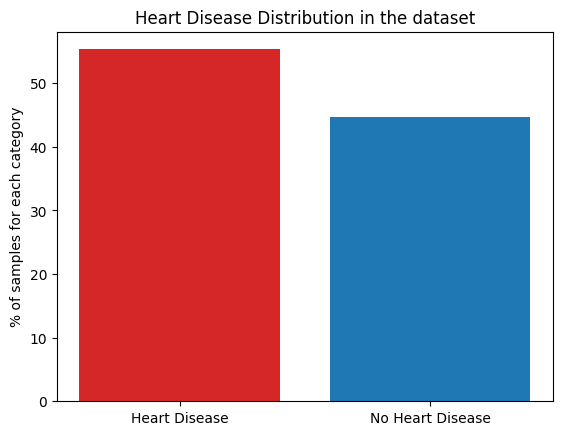

In [49]:
# Plot the target data distribution 
fig, ax = plt.subplots()

target = ['Heart Disease', 'No Heart Disease']
counts = [dataset['HeartDisease'].value_counts(normalize=True)[1]*100, dataset['HeartDisease'].value_counts(normalize=True)[0]*100]
bar_colors = ['tab:red', 'tab:blue']

ax.bar(target, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('% of samples for each category')
ax.set_title('Heart Disease Distribution in the dataset')

plt.show()


### What is the distribution of categorical features?

There are more Male sammples in the dataset than Female. The dataset seems imbalanced based on this feature.  

**Number of samples by Sex**  
  
There are **725 Male** samples and **193 Female** samples

<AxesSubplot:>

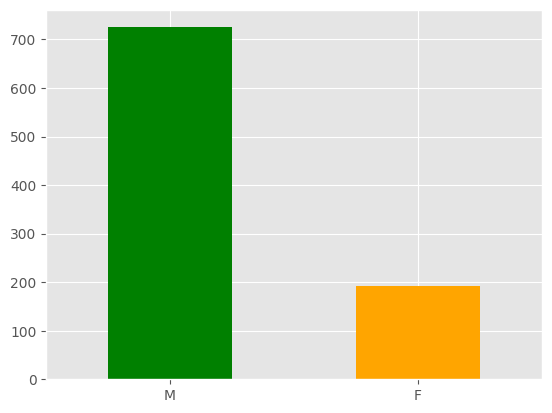

In [224]:
# number of samples in the dataset by Sex
dataset['Sex'].value_counts().plot.bar(color=['green','orange'], rot=0)

In [161]:
# % of samples in the datset by Sex
dataset['Sex'].value_counts(normalize=True)

M    0.78976
F    0.21024
Name: Sex, dtype: float64

#### Let's see which Sex has more Heart Diseases according to our Dataset  
It is observed that among the Female subset there are less Female samples with No heart disease. Different from the Male distribution where it is observed that there are more heart diseases among Males.

In [93]:
dataset.groupby(by='Sex')['HeartDisease'].value_counts()

Sex  HeartDisease
F    0               143
     1                50
M    1               458
     0               267
Name: HeartDisease, dtype: int64

In [80]:
heart_disease_by_sex = dataset.groupby(by='Sex')['HeartDisease'].value_counts(normalize=True)
heart_disease_by_sex

Sex  HeartDisease
F    0               0.740933
     1               0.259067
M    1               0.631724
     0               0.368276
Name: HeartDisease, dtype: float64

[]

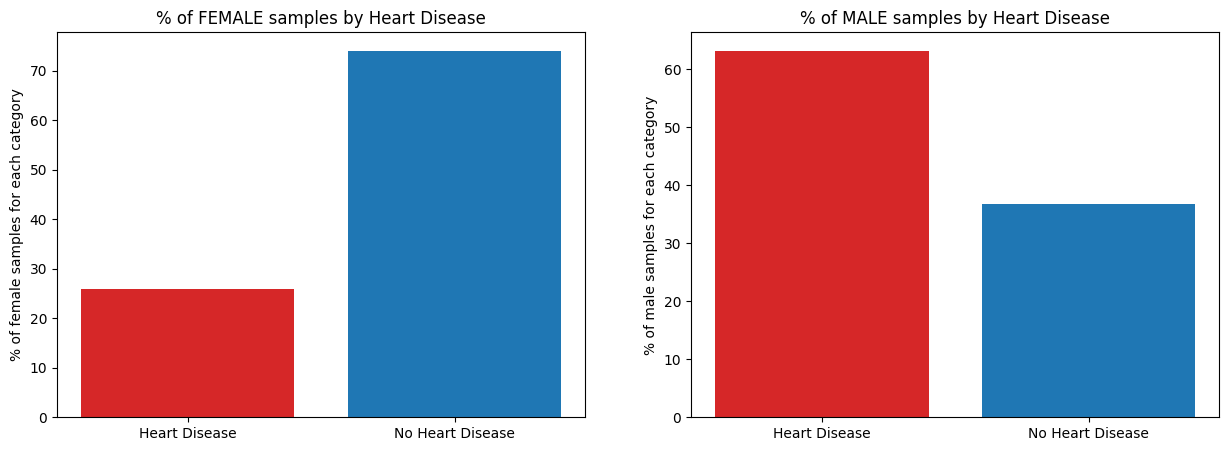

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

f_target = ['Heart Disease', 'No Heart Disease']
f_counts = [x*100 for x in [heart_disease_by_sex['F'][1], heart_disease_by_sex['F'][0]]]
m_target = ['Heart Disease', 'No Heart Disease']
m_counts = [x*100 for x in [heart_disease_by_sex['M'][1], heart_disease_by_sex['M'][0]]]

bar_colors = ['tab:red', 'tab:blue']

ax1.bar(f_target, f_counts, label=bar_labels, color=bar_colors)
ax1.set_ylabel('% of female samples for each category')
ax1.set_title('% of FEMALE samples by Heart Disease')

ax2.bar(m_target, m_counts, label=bar_labels, color=bar_colors)
ax2.set_ylabel('% of male samples for each category')
ax2.set_title('% of MALE samples by Heart Disease')

plt.plot()

### What about the distribution of Heart Disease in different age ranges?

In [94]:
#  function to convert age value into a range of values
def get_age_range(age):
    if age < 0 or age > 90:
        return "Invalid age"
    
    lower_bound = (age // 10) * 10
    upper_bound = lower_bound + 9
    
    return f"{lower_bound}-{upper_bound}"

In [96]:
# test the age range function
get_age_range(70)

'70-79'

In [105]:
# add a new columns that will contain age ranges
dataset['AgeRange'] = dataset['Age'].apply(get_age_range)

In [125]:
heart_disease_by_age_range = dataset.groupby(by=['AgeRange','HeartDisease'])['HeartDisease'].count()

In [126]:
heart_disease_by_age_range.keys()

MultiIndex([('20-29', 0),
            ('30-39', 0),
            ('30-39', 1),
            ('40-49', 0),
            ('40-49', 1),
            ('50-59', 0),
            ('50-59', 1),
            ('60-69', 0),
            ('60-69', 1),
            ('70-79', 0),
            ('70-79', 1)],
           names=['AgeRange', 'HeartDisease'])

In [134]:
target = [x[0] for x in heart_disease_by_age_range.keys()]
target = np.unique(target)
target

array(['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'], dtype='<U5')

In [141]:
no_heart_diseases_target = []
heart_diseases_target = []
key_of_targets = heart_disease_by_age_range.keys()
for t in target:
    if (t,0) not in key_of_targets:
        print("not zero")
        no_heart_diseases_target.append(0)
        continue
    else:
        no_heart_diseases_target.append(heart_disease_by_age_range[(t,0)])
    if (t,1) not in key_of_targets:
        heart_diseases_target.append(0)
    else:
         heart_diseases_target.append(heart_disease_by_age_range[(t,1)])
    
print("Number of samples with no heart disease by age range")
print(target)
print(no_heart_diseases_target)
print()
print(target)
print("Number of samples with heart disease by age range")
print(heart_diseases_target)

Number of samples with no heart disease by age range
['20-29' '30-39' '40-49' '50-59' '60-69' '70-79']
[4, 50, 126, 162, 59, 9]

['20-29' '30-39' '40-49' '50-59' '60-69' '70-79']
Number of samples with heart disease by age range
[0, 26, 85, 212, 163, 22]


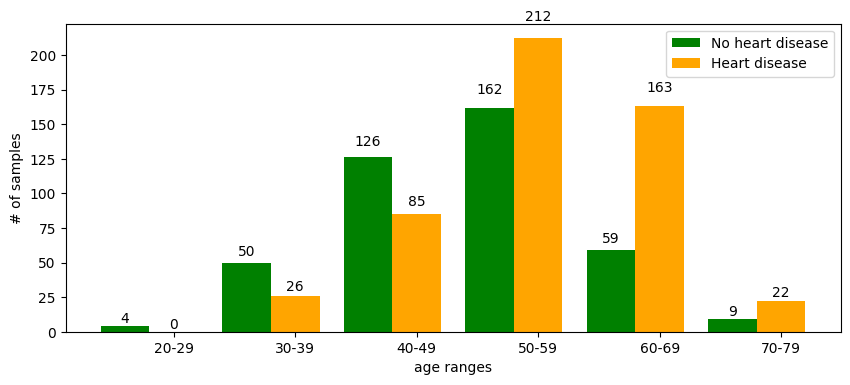

In [178]:
fig, ax = plt.subplots(figsize=(10,4))

ind = np.arange(len(target))  # the x locations for the groups
width = 0.4       # the width of the bars

no_heart_disease_bars = ax.bar(ind, no_heart_diseases_target, width, color='green')
heart_disease_bars = ax.bar(ind+width, heart_diseases_target, width, color='orange')

ax.set_ylabel('# of samples')
ax.set_xlabel('age ranges')
ax.set_xticks(ind+width)
ax.set_xticklabels( (target) )
ax.legend( (no_heart_disease_bars[0], heart_disease_bars[0]), ('No heart disease', 'Heart disease') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(no_heart_disease_bars)
autolabel(heart_disease_bars)


plt.show()

In [195]:
dataset['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

### What is the distribution of numerical features?


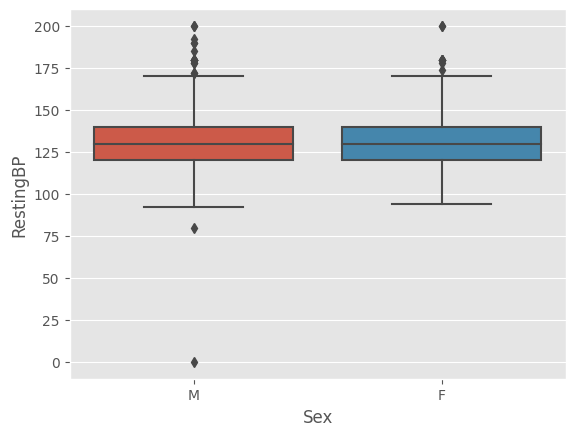

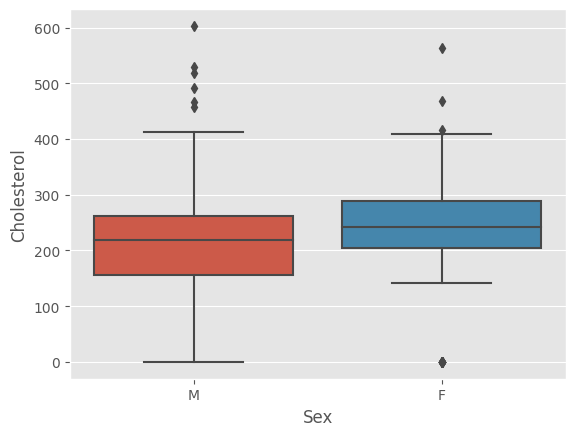

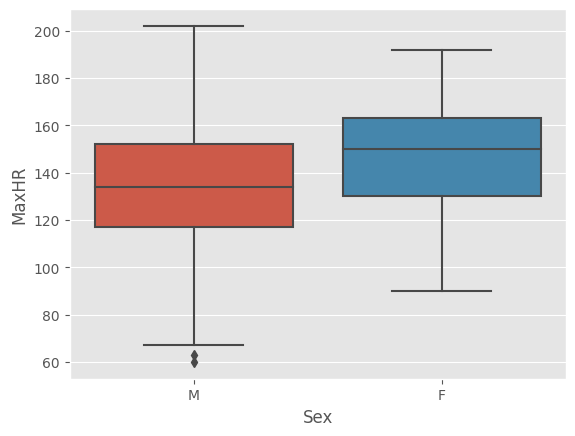

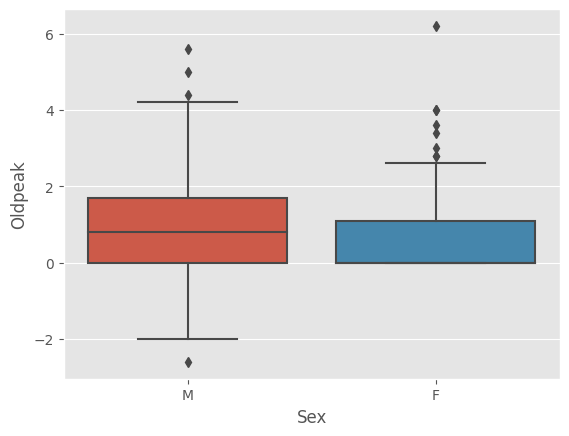

In [238]:
for c in ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']:
    plt.figure()
    sns.boxplot(data=dataset, x='Sex' ,y=c, orient='v')

<Figure size 640x480 with 0 Axes>

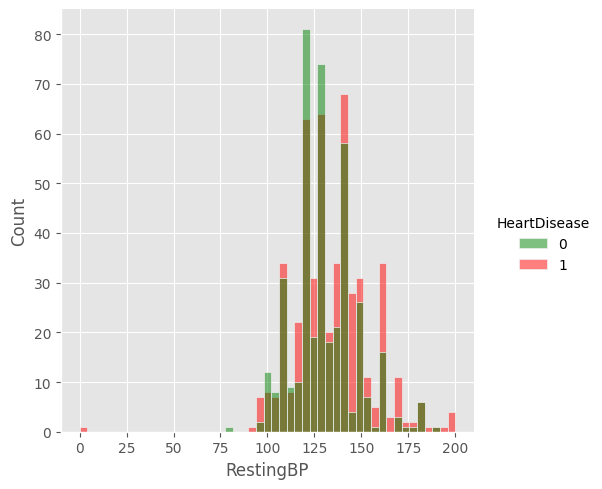

<Figure size 640x480 with 0 Axes>

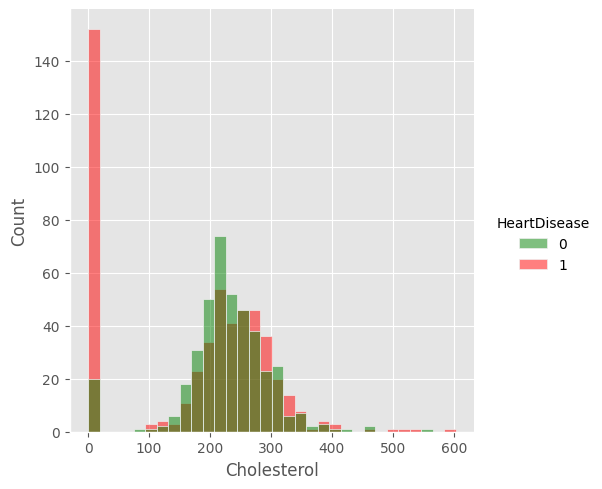

<Figure size 640x480 with 0 Axes>

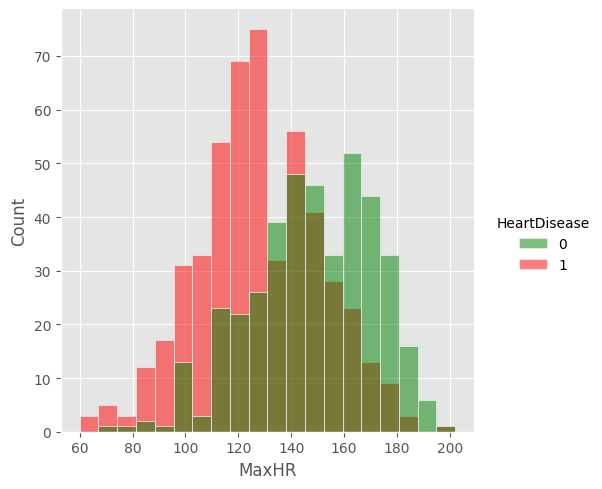

<Figure size 640x480 with 0 Axes>

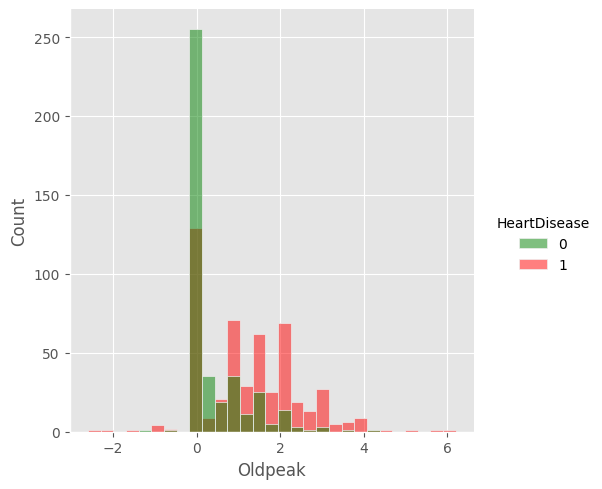

<Figure size 640x480 with 0 Axes>

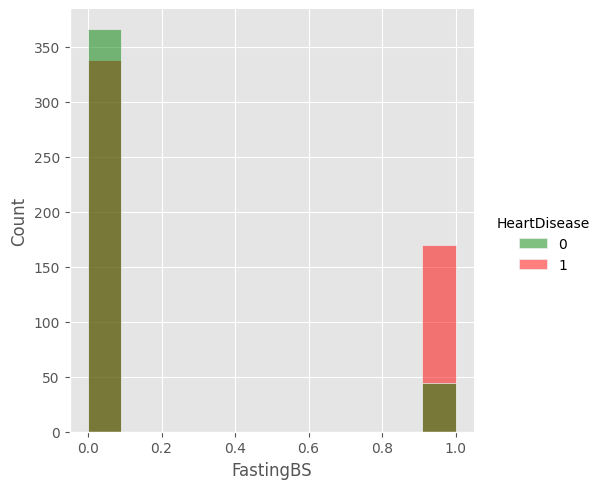

In [266]:
for c in ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS']:
    plt.figure()
    sns.displot(data=dataset, x=c, hue='HeartDisease', palette={0:'green', 1:'red'})

### What about the categorical data  

For categorical data we need to convert them into numerical values so we can visualize them so let's use a mapping to do so

<AxesSubplot:xlabel='Sex', ylabel='Age'>

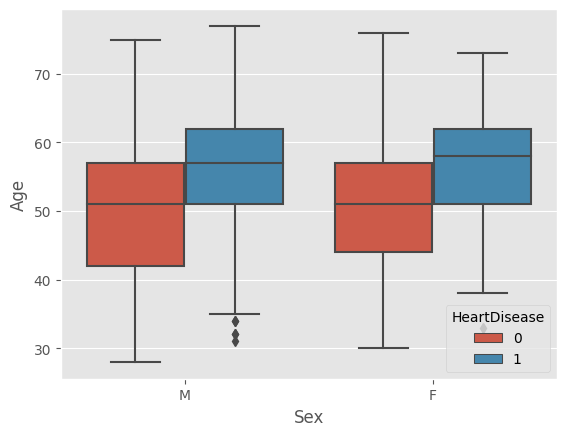

In [249]:
sns.boxplot(dataset, y='Age', x="Sex", hue="HeartDisease")

<AxesSubplot:xlabel='AgeRange', ylabel='Count'>

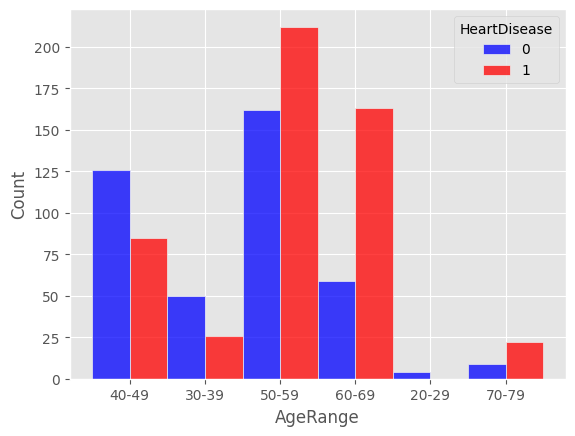

In [297]:
sns.histplot(dataset, x='AgeRange', hue='HeartDisease', multiple='dodge', palette=['blue','red'])

<AxesSubplot:xlabel='AgeRange', ylabel='Count'>

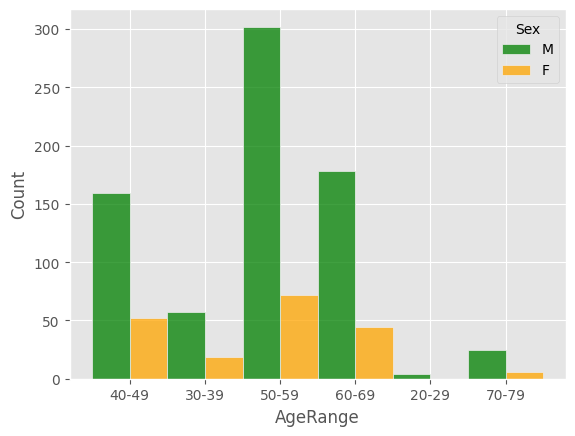

In [296]:
sns.histplot(dataset, x='AgeRange', hue='Sex', multiple='dodge', palette=['green', 'orange'])

<AxesSubplot:xlabel='ChestPainType', ylabel='Count'>

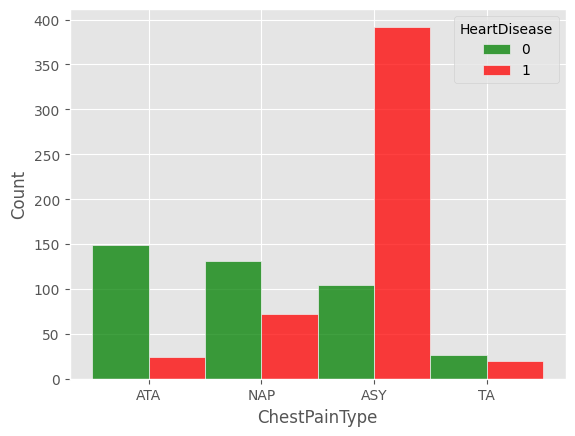

In [298]:
sns.histplot(dataset, x='ChestPainType', hue='HeartDisease', palette={0:'green', 1:'red'}, multiple='dodge')

<AxesSubplot:xlabel='RestingECG', ylabel='Count'>

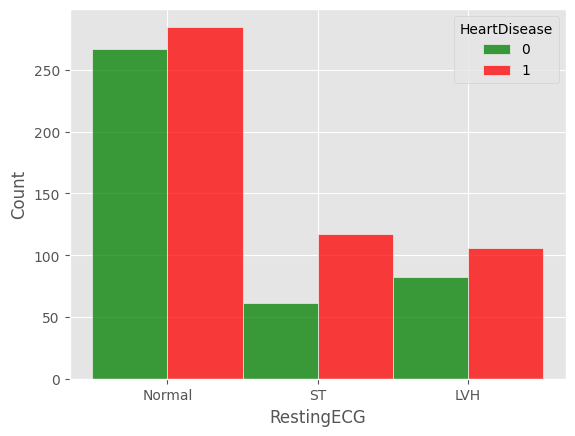

In [302]:
sns.histplot(dataset, x='RestingECG', hue='HeartDisease', palette={0:'green', 1:'red'}, multiple='dodge')

<AxesSubplot:xlabel='ExerciseAngina', ylabel='Count'>

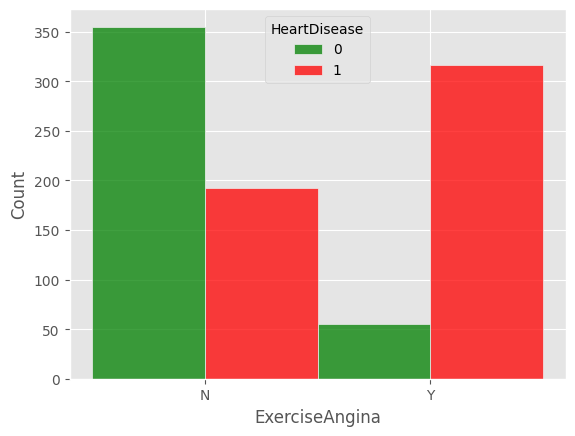

In [305]:
sns.histplot(dataset, x='ExerciseAngina', hue='HeartDisease', palette={0:'green', 1:'red'}, multiple='dodge')

<AxesSubplot:xlabel='ST_Slope', ylabel='Count'>

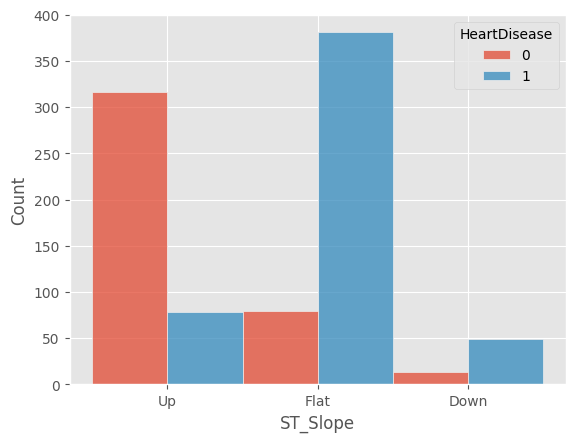

In [307]:
sns.histplot(dataset, x='ST_Slope', hue='HeartDisease', multiple='dodge')

#### Check correlation between numerical variables and target

In [213]:
corr = dataset[['RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'ST_Slope','HeartDisease']].corr()
corr.style.background_gradient(cmap='coolwarm')

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
RestingBP,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


#### Create models to predict HeartDisease

#### First, let's split our dataset into train, dev and test So we can perform some preprocessing on the training set that we are going to apply later on the other sets.

In [310]:
from sklearn.model_selection import train_test_split

In [319]:
X_train_df, X_test_df, y_train, y_test = train_test_split(dataset, dataset['HeartDisease'], random_state=42, test_size=0.1)
X_train_df, X_dev_df, y_train, y_dev = train_test_split(X_train_df, X_train_df['HeartDisease'], random_state=42, test_size=0.11)

In [344]:
X_train_df.reset_index(inplace=True, drop=True)
X_test_df.reset_index(inplace=True, drop=True)
X_dev_df.reset_index(inplace=True, drop=True)

In [320]:
#  let's check the size of our sets
print("Train size", X_train_df.shape)
print("Dev size", X_dev_df.shape)
print("Test size", X_test_df.shape)

Train size (735, 13)
Dev size (91, 13)
Test size (92, 13)


In [324]:
# check the distributiton of our target
print("Original target distribution")
print(dataset['HeartDisease'].value_counts(normalize=True))
print("Train target distribution")
print(X_train_df['HeartDisease'].value_counts(normalize=True))
print("Dev target distribution")
print(X_dev_df['HeartDisease'].value_counts(normalize=True))
print("Test target distribution")
print(X_test_df['HeartDisease'].value_counts(normalize=True))

Original target distribution
1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64
Train target distribution
1    0.556463
0    0.443537
Name: HeartDisease, dtype: float64
Dev target distribution
0    0.505495
1    0.494505
Name: HeartDisease, dtype: float64
Test target distribution
1    0.586957
0    0.413043
Name: HeartDisease, dtype: float64


In [325]:
# check the distributiton of Sex feature
print("Original Sex distribution")
print(dataset['Sex'].value_counts(normalize=True))
print("Train Sex distribution")
print(X_train_df['Sex'].value_counts(normalize=True))
print("Dev Sex distribution")
print(X_dev_df['Sex'].value_counts(normalize=True))
print("Test Sex distribution")
print(X_test_df['Sex'].value_counts(normalize=True))

Original Sex distribution
M    0.78976
F    0.21024
Name: Sex, dtype: float64
Train Sex distribution
M    0.785034
F    0.214966
Name: Sex, dtype: float64
Dev Sex distribution
M    0.758242
F    0.241758
Name: Sex, dtype: float64
Test Sex distribution
M    0.858696
F    0.141304
Name: Sex, dtype: float64


In [341]:
# check the distributiton of AgeRange feature
print("Original AgeRange distribution")
for x in sorted(dict(dataset['AgeRange'].value_counts(normalize=True)).items()):
    print(x[0],'-', round(float(x[1])*100,2))
print()
print("Train AgeRange distribution")
for x in sorted(dict(X_train_df['AgeRange'].value_counts(normalize=True)).items()):
    print(x[0],'-', round(float(x[1])*100,2))
print()
print("Dev AgeRange distribution")
for x in sorted(dict(X_dev_df['AgeRange'].value_counts(normalize=True)).items()):
    print(x[0],'-', round(float(x[1])*100,2))
print()
print("Test AgeRange distribution")
for x in sorted(dict(X_test_df['AgeRange'].value_counts(normalize=True)).items()):
    print(x[0],'-', round(float(x[1])*100,2))

Original AgeRange distribution
20-29 - 0.44
30-39 - 8.28
40-49 - 22.98
50-59 - 40.74
60-69 - 24.18
70-79 - 3.38

Train AgeRange distribution
20-29 - 0.41
30-39 - 7.89
40-49 - 22.72
50-59 - 41.9
60-69 - 23.95
70-79 - 3.13

Dev AgeRange distribution
30-39 - 12.09
40-49 - 25.27
50-59 - 35.16
60-69 - 21.98
70-79 - 5.49

Test AgeRange distribution
20-29 - 1.09
30-39 - 7.61
40-49 - 22.83
50-59 - 36.96
60-69 - 28.26
70-79 - 3.26


It looks that the distribution of our 3 sets are ok, so now let's work on some preprocessing steps like Normalization | Standardization and categorial features encoding

In [346]:
# Lets copy our X_train_df so we work over it without affecting original train ds
X_train = X_train_df.copy()

In [349]:
# drop Age and HeartDisease Columns
X_train.drop(['Age', 'HeartDisease'], axis=1, inplace=True)

In [486]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [354]:
lb_sex = LabelBinarizer()
lb_sex.fit(X_train['Sex'])
X_train['Sex'] = lb_sex.transform(X_train['Sex'])

In [375]:
chestpaintype_encoder = OneHotEncoder(handle_unknown='ignore')
chestpaintype_encoder.fit(X_train['ChestPainType'].values.reshape(-1,1), )
chestpaintype_encoder.transform(X_train['ChestPainType'].values.reshape(-1,1)).toarray()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [382]:
X_train[[f'cpt_{x}' for x in chestpaintype_encoder.categories_[0]]] = chestpaintype_encoder.transform(X_train['ChestPainType'].values.reshape(-1,1)).toarray()

In [391]:
exerciseangina_lbinarizer = LabelBinarizer()
exerciseangina_lbinarizer.fit(X_train['ExerciseAngina'])

LabelBinarizer()

In [392]:
X_train['ExerciseAngina'] = exerciseangina_lbinarizer.transform(X_train['ExerciseAngina'])

In [399]:
restingECG_encoder = OneHotEncoder(handle_unknown='ignore')
restingECG_encoder.fit(X_train['RestingECG'].values.reshape(-1,1))
restingECG_encoder.transform(X_train['RestingECG'].values.reshape(-1,1))

<735x3 sparse matrix of type '<class 'numpy.float64'>'
	with 735 stored elements in Compressed Sparse Row format>

In [402]:
X_train[[f'recg_{x}' for x in restingECG_encoder.categories_[0]]] = restingECG_encoder.transform(X_train['RestingECG'].values.reshape(-1,1)).toarray()

In [404]:
X_train['ST_Slope'].value_counts()

Flat    375
Up      313
Down     47
Name: ST_Slope, dtype: int64

In [414]:
st_slope_encoder.categories_[0]

array(['Down', 'Flat', 'Up'], dtype=object)

In [413]:
st_slope_encoder = OrdinalEncoder(categories=[['Down', 'Flat', 'Up']])
st_slope_encoder.fit(X_train['ST_Slope'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['Down', 'Flat', 'Up']])

In [422]:
X_train['ST_Slope'] = st_slope_encoder.transform(X_train['ST_Slope'].values.reshape(-1, 1))

In [425]:
X_train['AgeRange'].value_counts().keys()

Index(['50-59', '60-69', '40-49', '30-39', '70-79', '20-29'], dtype='object')

In [428]:
age_range_encoder = OrdinalEncoder(categories=[[ '20-29','30-39','40-49','50-59','60-69','70-79']])
age_range_encoder.fit(X_train['AgeRange'].values.reshape(-1,1))

OrdinalEncoder(categories=[['20-29', '30-39', '40-49', '50-59', '60-69',
                            '70-79']])

In [430]:
X_train['AgeRange'] = age_range_encoder.transform(X_train['AgeRange'].values.reshape(-1,1))

In [432]:
X_train_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'AgeRange'],
      dtype='object')

In [435]:
X_train.drop(['ChestPainType','RestingECG'] ,axis=1, inplace=True)

In [440]:
feature_scaler = StandardScaler()
feature_scaler.fit(X_train[['RestingBP', 'Cholesterol', 'MaxHR']])

StandardScaler()

In [443]:
X_train[['RestingBP', 'Cholesterol', 'MaxHR']] = feature_scaler.transform(X_train[['RestingBP', 'Cholesterol', 'MaxHR']])

In [493]:
def preprocess_set(dataframe):
    result = dataframe.copy()
    result.drop(['Age', 'HeartDisease'], axis=1, inplace=True)
    result['Sex'] = lb_sex.transform(result['Sex'])
    result[[f'cpt_{x}' for x in chestpaintype_encoder.categories_[0]]] = chestpaintype_encoder.transform(result['ChestPainType'].values.reshape(-1,1)).toarray()
    result['ExerciseAngina'] = exerciseangina_lbinarizer.transform(result['ExerciseAngina'])
    result[[f'recg_{x}' for x in restingECG_encoder.categories_[0]]] = restingECG_encoder.transform(result['RestingECG'].values.reshape(-1,1)).toarray()
    result['ST_Slope'] = st_slope_encoder.transform(result['ST_Slope'].values.reshape(-1, 1))
    result['AgeRange'] = age_range_encoder.transform(result['AgeRange'].values.reshape(-1,1))
    result.drop(['ChestPainType','RestingECG'] ,axis=1, inplace=True)
    result[['RestingBP', 'Cholesterol', 'MaxHR']] = feature_scaler.transform(result[['RestingBP', 'Cholesterol', 'MaxHR']])
    # result[['ST_Slope', 'AgeRange']] = slope_age_scaler.transform(result[['ST_Slope', 'AgeRange']])
    return result

In [494]:
X_dev = preprocess_set(X_dev_df)
X_test = preprocess_set(X_test_df)

In [461]:
y_train = y_train.values
y_dev = y_dev.values
y_test = y_test.values

<AxesSubplot:>

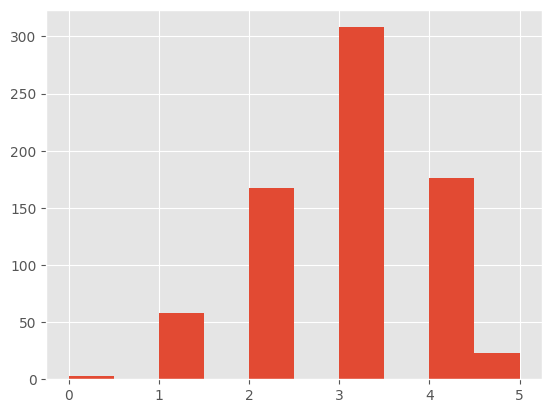

In [504]:
X_train['AgeRange'].hist()

In [453]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

In [559]:
dt_classifier = DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_split=5,
                       random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_split=5,
                       random_state=42)

In [560]:
sorted([(x*100,y) for x,y in zip(dt_classifier.feature_importances_, dt_classifier.feature_names_in_)], key=lambda x: x[0], reverse=True)

[(44.716628136238, 'cpt_ASY'),
 (27.47862920227191, 'ST_Slope'),
 (6.928090850933153, 'ExerciseAngina'),
 (6.614130484555295, 'Cholesterol'),
 (4.613757041597233, 'Oldpeak'),
 (2.5617250197104213, 'MaxHR'),
 (2.4663183897652194, 'Sex'),
 (1.472466868169683, 'cpt_TA'),
 (1.1956958974303276, 'RestingBP'),
 (0.8226866903331866, 'AgeRange'),
 (0.6584994705277918, 'recg_LVH'),
 (0.2936445704084533, 'FastingBS'),
 (0.1522919505318942, 'recg_ST'),
 (0.02543542752743245, 'recg_Normal'),
 (0.0, 'cpt_ATA'),
 (0.0, 'cpt_NAP')]

In [471]:
dt_classifier.feature_names_in_

array(['Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'AgeRange', 'cpt_ASY',
       'cpt_ATA', 'cpt_NAP', 'cpt_TA', 'recg_LVH', 'recg_Normal',
       'recg_ST'], dtype=object)

In [561]:
y_pred = dt_classifier.predict(X_dev)

In [562]:
accuracy_score(y_dev, y_pred)

0.8901098901098901

In [563]:
y_pred_test = dt_classifier.predict(X_test)

In [564]:
accuracy_score(y_test, y_pred_test)

0.8804347826086957

In [476]:
from sklearn.linear_model import LogisticRegression

In [620]:
lg_clf = LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')
lg_clf.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

In [621]:
accuracy_score(y_dev, lg_clf.predict(X_dev))

0.8791208791208791

In [622]:
accuracy_score(y_test, lg_clf.predict(X_test))

0.8369565217391305

<AxesSubplot:>

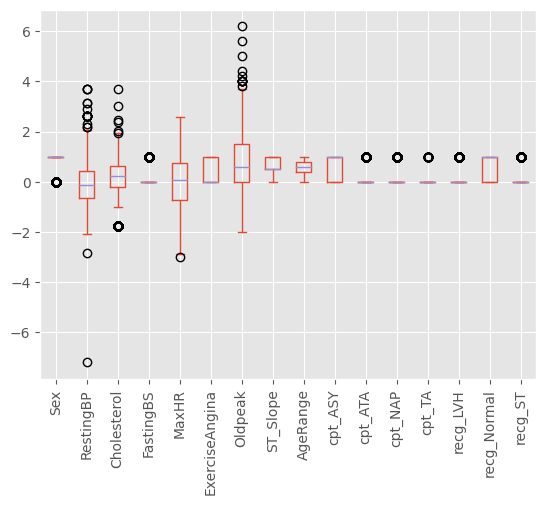

In [498]:
X_train.plot.box(rot=90)

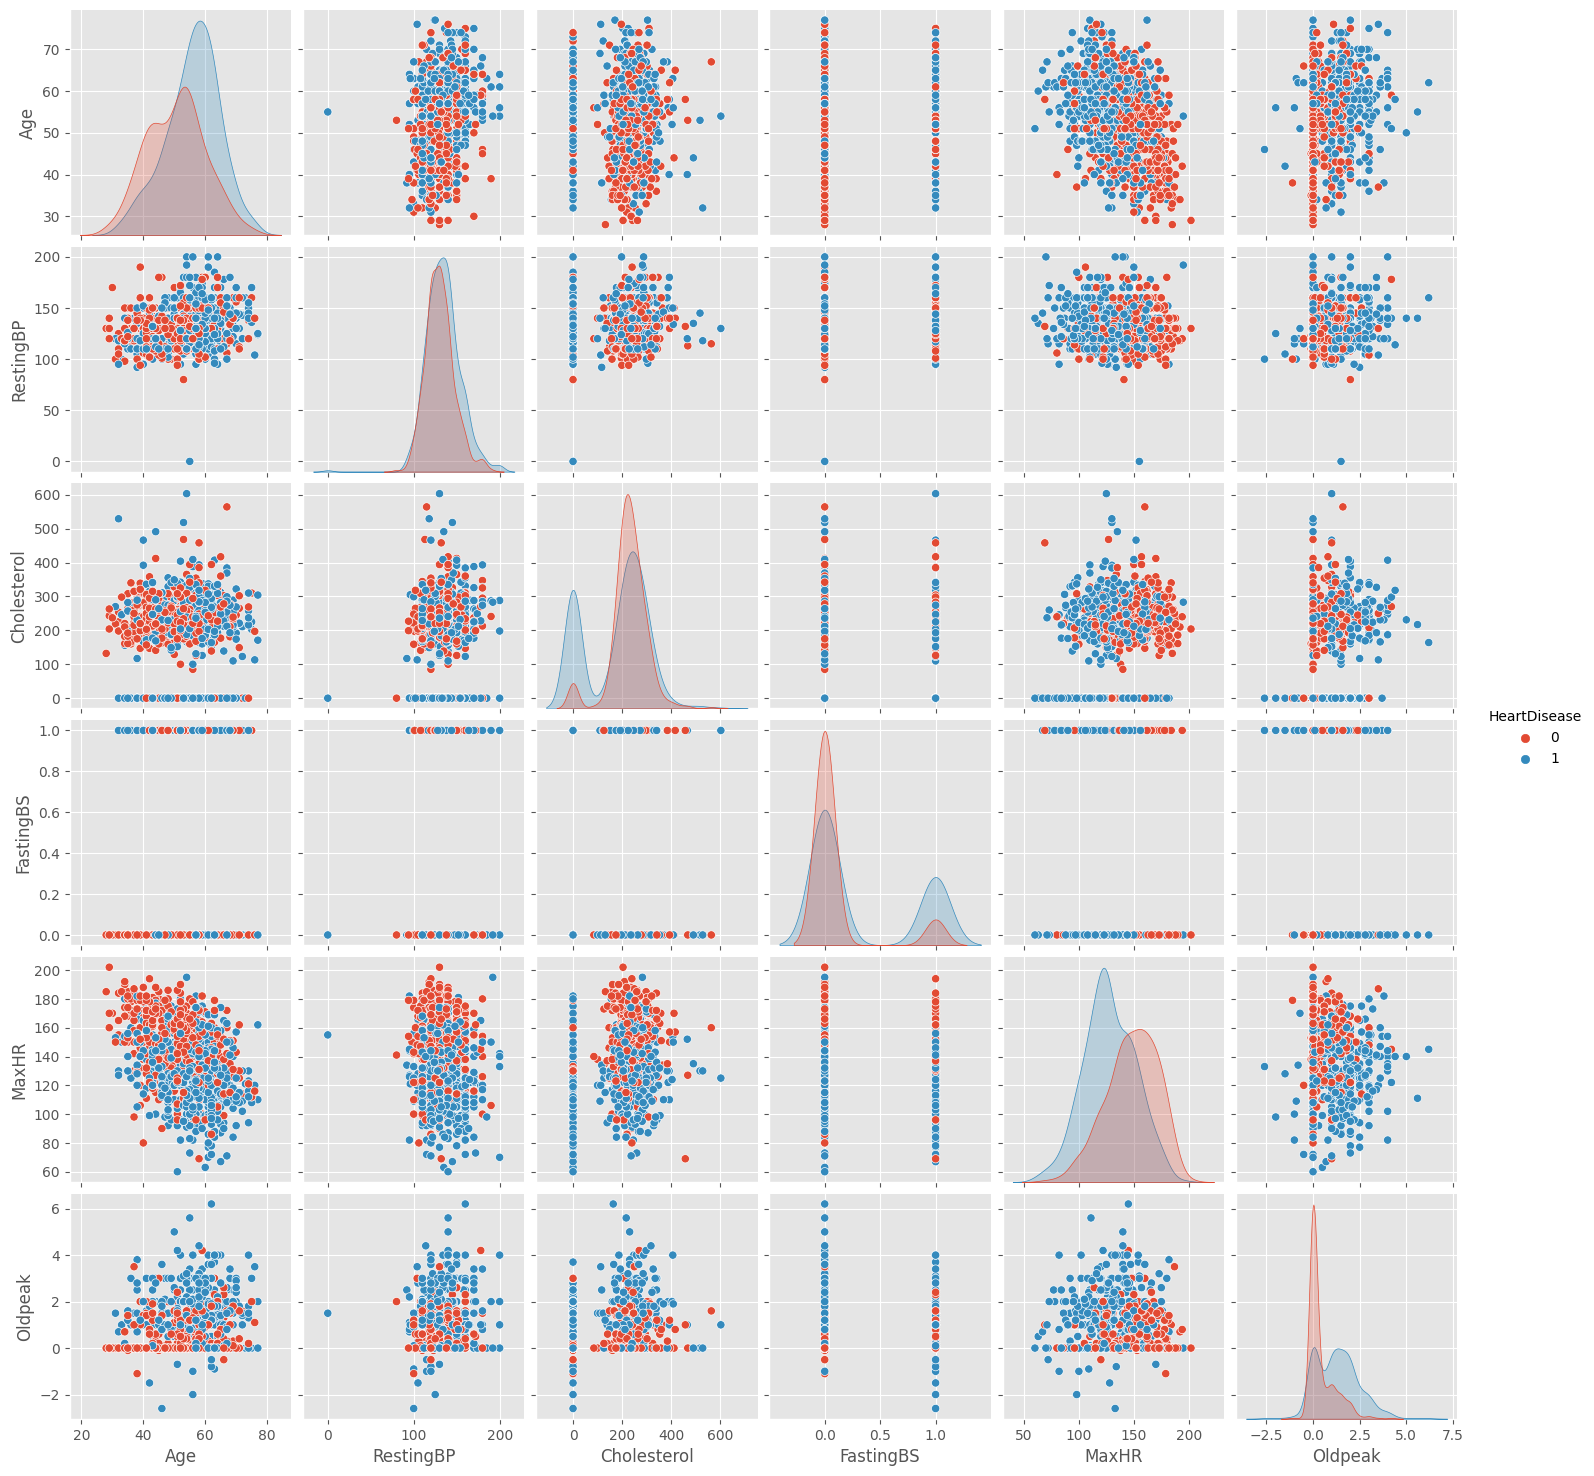

In [510]:
sns.pairplot(dataset, hue='HeartDisease')

In [550]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [540]:
skf = StratifiedKFold(n_splits=5)

X_kfold_train = pd.concat([X_train, X_dev])
y_kfold_train = np.concatenate([y_train, y_dev])
skf.get_n_splits(X_kfold_train, y_kfold_train)

5

In [602]:
def kfold_training(estimator, X_train, y_train, n_splits=5, estimator_params = {}, random_state=42):
    skf = StratifiedKFold(n_splits=n_splits)
    skf.get_n_splits(X_train, y_train)
    cummulative_accuracy = []
    for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
        print(f"  Fold {i}:")
        print(f"  Training fold size: {X_train.iloc[train_index,:].shape}")
        print(f"  Test fold size: {X_train.iloc[test_index,:].shape}")

        classifier = estimator(random_state=random_state)
        classifier.set_params(**estimator_params)
        classifier.fit(X_train.iloc[train_index,:], y_train[train_index])

        y_prime = classifier.predict(X_train.iloc[test_index,:])
        acc_score = accuracy_score(y_prime, y_train[test_index])
        print(f"  Accuracy of {i}-fold: {acc_score}")
        cummulative_accuracy.append(acc_score)
        print()
    print(f"Avg. accuracy accross Folds {np.average(cummulative_accuracy)}")

In [609]:
kfold_training(DecisionTreeClassifier, X_kfold_train, y_kfold_train, n_splits=5)

  Fold 0:
  Training fold size: (660, 16)
  Test fold size: (166, 16)
  Accuracy of 0-fold: 0.8614457831325302

  Fold 1:
  Training fold size: (661, 16)
  Test fold size: (165, 16)
  Accuracy of 1-fold: 0.8121212121212121

  Fold 2:
  Training fold size: (661, 16)
  Test fold size: (165, 16)
  Accuracy of 2-fold: 0.7636363636363637

  Fold 3:
  Training fold size: (661, 16)
  Test fold size: (165, 16)
  Accuracy of 3-fold: 0.7878787878787878

  Fold 4:
  Training fold size: (661, 16)
  Test fold size: (165, 16)
  Accuracy of 4-fold: 0.8242424242424242

Avg. accuracy accross Folds 0.8098649142022636


In [595]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting: Gini impurity or information gain
    'splitter': ['best', 'random'],    # Strategy for choosing the split at each node
    'max_depth': [None, 5, 10, 20],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'random_state': [42]               # Random seed for reproducibility
}

grid_search_cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', verbose=True)
grid_search_cv.fit(X_kfold_train, y_kfold_train)
grid_search_cv.best_estimator_.get_params()

In [607]:
kfold_training(DecisionTreeClassifier, X_kfold_train, y_kfold_train, estimator_params=grid_search_cv.best_estimator_.get_params())

  Fold 0:
  Training fold size: (660, 16)
  Test fold size: (166, 16)
  Accuracy of 0-fold: 0.8795180722891566

  Fold 1:
  Training fold size: (661, 16)
  Test fold size: (165, 16)
  Accuracy of 1-fold: 0.7878787878787878

  Fold 2:
  Training fold size: (661, 16)
  Test fold size: (165, 16)
  Accuracy of 2-fold: 0.8666666666666667

  Fold 3:
  Training fold size: (661, 16)
  Test fold size: (165, 16)
  Accuracy of 3-fold: 0.806060606060606

  Fold 4:
  Training fold size: (661, 16)
  Test fold size: (165, 16)
  Accuracy of 4-fold: 0.8242424242424242

Avg. accuracy accross Folds 0.8328733114275284


In [613]:
kfold_training(LogisticRegression, X_kfold_train, y_kfold_train, estimator_params=grid_search_cv.best_estimator_.get_params())

  Fold 0:
  Training fold size: (660, 16)
  Test fold size: (166, 16)
  Accuracy of 0-fold: 0.8674698795180723

  Fold 1:
  Training fold size: (661, 16)
  Test fold size: (165, 16)
  Accuracy of 1-fold: 0.8363636363636363

  Fold 2:
  Training fold size: (661, 16)
  Test fold size: (165, 16)
  Accuracy of 2-fold: 0.8848484848484849

  Fold 3:
  Training fold size: (661, 16)
  Test fold size: (165, 16)
  Accuracy of 3-fold: 0.8424242424242424

  Fold 4:
  Training fold size: (661, 16)
  Test fold size: (165, 16)
  Accuracy of 4-fold: 0.8242424242424242

Avg. accuracy accross Folds 0.851069733479372


In [617]:
param_grid = {
    'penalty': ['l1', 'l2'],            # Regularization penalty: L1 or L2
    'C': [0.001, 0.01, 0.1, 1, 10],     # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],    # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300],        # Maximum number of iterations for optimization
    'random_state': [42]                # Random seed for reproducibility
}

grid_search_cv = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy', verbose=True)
grid_search_cv.fit(X_kfold_train, y_kfold_train)
grid_search_cv.best_estimator_.get_params()

Fitting 5 folds for each of 60 candidates, totalling 300 fits


D:\projects\machine_learning_projects\venv\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\projects\machine_learning_projects\venv\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\projects\machine_learning_projects\venv\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\projects\machine_learning_projects\venv\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\projects\machine_learning_projects\venv\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\projects\machine_learning_projects\venv\lib\site-packages\sklearn\linear_model\_sag.py:354: 

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [619]:
grid_search_cv.best_estimator_

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

In [512]:
X_train.columns

Index(['Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'AgeRange', 'cpt_ASY',
       'cpt_ATA', 'cpt_NAP', 'cpt_TA', 'recg_LVH', 'recg_Normal', 'recg_ST'],
      dtype='object')

In [39]:
pd.get_dummies(dataset['ChestPainType'])

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
913,0,0,0,1
914,1,0,0,0
915,1,0,0,0
916,0,1,0,0


In [84]:
one_hot_for_CPT = OneHotEncoder()
one_hot_for_CPT.fit(dataset['ChestPainType'].values.reshape(-1,1))

OneHotEncoder()

In [85]:
one_hot_for_CPT.transform(dataset['ChestPainType'].values.reshape(-1,1)).toarray()

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [86]:
one_hot_for_CPT.categories_

[array(['ASY', 'ATA', 'NAP', 'TA'], dtype=object)]